#### DATA PREPROCESSING

##### Importing libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

##### Verifying the first 5 dataset rows

In [17]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Verifying the dataset shape and understanding the type of data that this dataset contains

In [6]:
df.shape

(1000, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


This dataset contains 1000 observations and 8 features, 3 numerical columns and 5 categorical columns. 

##### Calling a descriptive statistical analysis of the dataset

In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Checking duplicates and missing values

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

There are no null values or duplicates over the data

##### Checking the total unique values present in the features

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### Defining categorical and numerical features

In [14]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)

Categorical columns : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [15]:
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Numerical columns : ['math score', 'reading score', 'writing score']


#### EXPLORATORY DATA ANALYSIS (VISUALIZATIONS)

#### Analysing Students by Gender 

In [42]:
# Getting "gender" unique values
print(df['gender'].unique())

['female' 'male']


In [43]:
# Checking the number of students present in each gender
gender_counts = pd.DataFrame(df['gender'].value_counts()).sort_values('gender')
gender_counts

,count
gender,
female,518
male,482


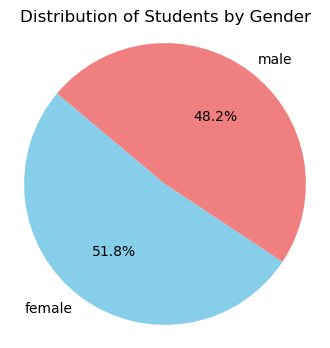

In [56]:
# Extracting the genders values and labels
values = gender_counts.values.flatten()
labels = gender_counts.index

# Creating a pie graph
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Students by Gender')
plt.axis('equal') 
plt.show()

The female and male genders have very similar values of students, represented by 518 (48.2%) and 482 (51.8%) students respectively."

#### Analysing students by Race/Ethnicity

In [53]:
# Checking the number of students present in each gender
re_counts = pd.DataFrame(df['race/ethnicity'].value_counts()).sort_values('race/ethnicity')
re_counts

,count
race/ethnicity,
group A,89
group B,190
group C,319
group D,262
group E,140


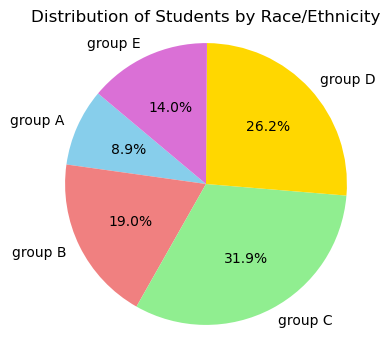

In [57]:
# Extracting the genders values and labels
values = re_counts.values.flatten()
labels = re_counts.index

# Creating a pie graph
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral','lightgreen', 'gold', 'orchid'])
plt.title('Distribution of Students by Race/Ethnicity')
plt.axis('equal')  

plt.show()

It can be observed the majority of students belong to groups C and D whereas group A has the lowest student count.

#### Analysing Student's Parents by Level of Education

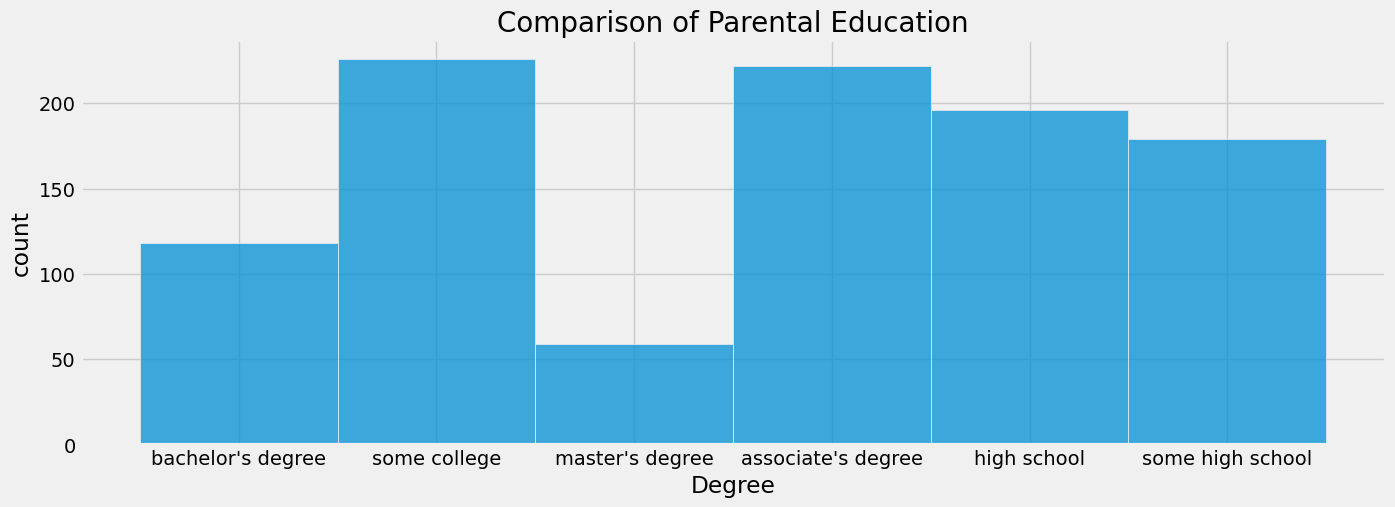

In [81]:
# Creating a bar graph
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
sns.histplot(df["parental level of education"], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

It can be observed that the majority students parental education is "some college" while just a little over 50 is "master's degree".

#### Analysing the maximum score of students in the three subjects

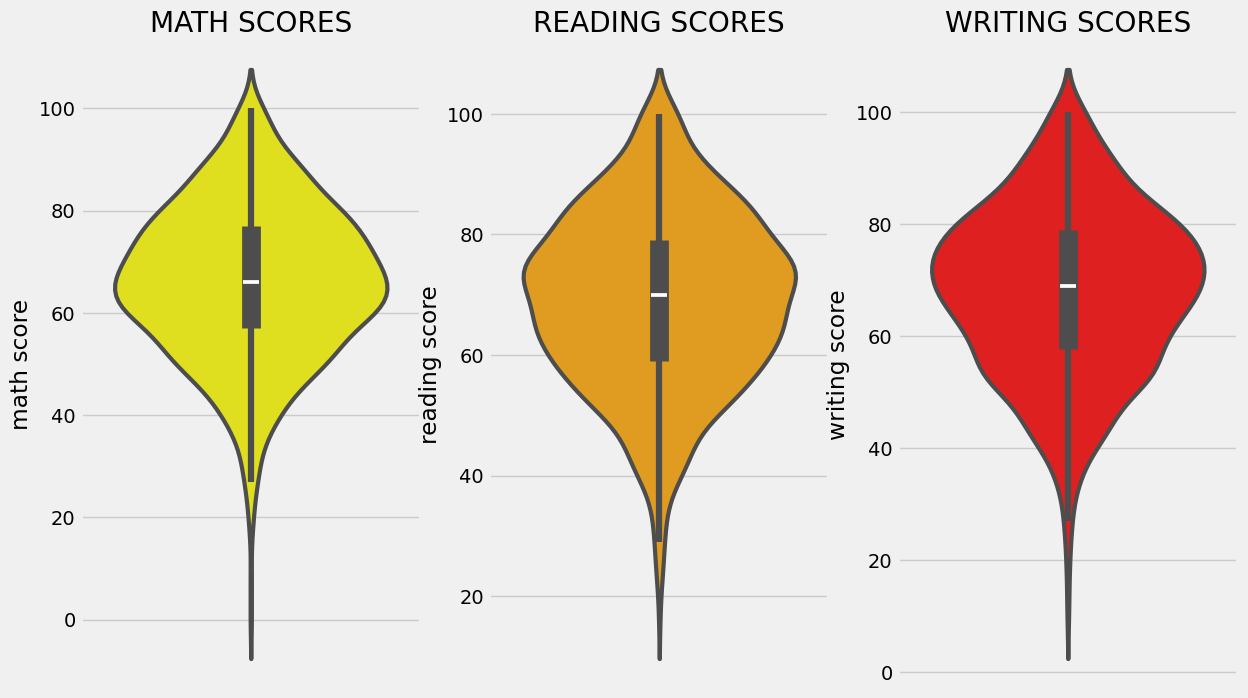

In [83]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='yellow', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='orange', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='red', linewidth=3)

plt.show()

It can be observed that a majority of students score between 60 and 80 in Math, while in reading and writing, most of them score between 50 and 80.

#### MODELING